<a href="https://colab.research.google.com/github/jamg-upv/Reto21d_ago24_LLMclassification/blob/main/Reto21d_ago24_LLMhiwp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Preparacion previa (ejecutar solo una vez


In [23]:
# pip install transformers

from transformers import AutoTokenizer, AutoModel
import torch
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
import pandas as pd

# Leer el archivo CSV
hiwp_data = pd.read_csv("hiwp_components.csv")

# Cargar el modelo y el tokenizador
tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased")
model = AutoModel.from_pretrained("bert-base-uncased")

# Tokenizar las descripciones de HIWP
tokenized_texts = [tokenizer.encode_plus(text, return_tensors="pt", padding=True) for text in hiwp_data["Description"].tolist()]

# Generar embeddings con output_hidden_states=True
hiwp_component_embeddings = [model(**encoded_text, output_hidden_states=True).hidden_states for encoded_text in tokenized_texts]


In [24]:

# 1. Ver los embeddings generados
print("Embeddings generados:")
for i, embeddings in enumerate(hiwp_component_embeddings):
    print(f"Componente {hiwp_data['Component'].iloc[i]}:")
    print(embeddings[-1])  # Embeddings de la última capa
    print()


Embeddings generados:
Componente Rigorous Selection and Recruitment:
tensor([[[-0.3533, -0.2151, -0.4702,  ..., -0.2468,  0.3493,  0.5536],
         [ 0.1384, -0.1292,  0.0128,  ...,  0.2845,  0.8090, -0.1161],
         [-0.2752,  0.1552,  0.0591,  ...,  0.2350,  0.0494, -0.1295],
         ...,
         [ 0.1449, -0.4283,  0.2122,  ...,  0.3763,  0.4205, -1.4217],
         [ 0.0839, -0.8195,  0.0819,  ...,  0.4297,  0.2249, -1.4668],
         [ 0.8447,  0.0195, -0.2636,  ...,  0.2616, -0.5721, -0.1031]]],
       grad_fn=<NativeLayerNormBackward0>)

Componente Continuous Training and Development:
tensor([[[-0.3148, -0.3152, -0.2012,  ..., -0.3575,  0.5175,  0.2002],
         [ 0.1599, -0.3758,  0.1254,  ...,  0.3433,  1.0327, -0.6315],
         [-0.4845, -0.1295,  0.0603,  ...,  0.0647,  0.0759, -0.4864],
         ...,
         [ 0.1203, -0.6774,  0.2312,  ...,  0.7325,  0.2028, -1.9204],
         [ 0.2109, -1.0315,  0.1410,  ...,  0.6228,  0.4821, -1.6934],
         [ 0.7779,  0.0219, 

##este cdigo funciona para extraer embeedings pero no consigo reutilizarlos despues

In [13]:
# Cargar el modelo IAgen
model = pipeline('feature-extraction', model='bert-base-uncased')

# Generar representaciones vectoriales de las componentes de HIWP
hiwp_component_embeddings = [model(component)[0] for component in hiwp_data["Description"].tolist()]

# Imprimir el tipo del primer elemento de la primera sublista
print(type(hiwp_component_embeddings[0][0]))

# Si el elemento es un tensor de PyTorch, imprimir su forma
if isinstance(hiwp_component_embeddings[0][0], torch.Tensor):
    print(hiwp_component_embeddings[0][0].shape)

    print(model(hiwp_data["Description"][0]))

[[[-0.3533148467540741, -0.21513661742210388, -0.47016096115112305, -0.02450808696448803, 0.517326295375824, -0.38760846853256226, 0.017082933336496353, 0.5354235172271729, -0.027287933975458145, -0.9179192781448364, -0.10439053922891617, 0.14401423931121826, 0.13754397630691528, 0.20004616677761078, -0.24756985902786255, 0.003025476122274995, 0.24697193503379822, 0.7981260418891907, 0.17722423374652863, -0.5300544500350952, -0.6994251608848572, -0.6386146545410156, -0.034964513033628464, 0.46650704741477966, -0.1518421620130539, -0.09932739287614822, 0.09184559434652328, -0.17062243819236755, -0.05119341239333153, -0.27797651290893555, -0.35425645112991333, -0.6134098768234253, -0.13744737207889557, -0.685953676700592, 0.1872338354587555, 0.11063522100448608, -0.25164249539375305, 0.25731736421585083, -0.08128700405359268, 0.03757414594292641, -0.7738260626792908, 1.0036715269088745, 0.675430417060852, -0.015041404403746128, 0.017550557851791382, 0.21194790303707123, -4.57754039764404

un nuvo enfoque con ChatGPT
Quiero un codigo python para correr en google collab  que 1) me permita ver los embeddings generados; 2) me agrupe los components por proximidad de embeddings; 3) una tabla de distancia de cosenos entre todos los componentes. Si es posible quiero que los embeedigns se extraigan con un modelo pre-entrenado (por ejmplo BERT o el que sea mas adecuado apra esta tareas) mis datos están en # Leer el archivo CSV
hiwp_data = pd.read_csv("hiwp_components.csv") que es un csv con dos columnas: Component,Description


Tabla de distancia de cosenos:
Component                                        Rigorous Selection and Recruitment  \
Component                                                                             
Rigorous Selection and Recruitment                                         1.000000   
Continuous Training and Development                                        0.803890   
Employee participation Autonomy and Empowerment                            0.767830   
Performance Evaluation and Feedback                                        0.627080   
Competitive Compensation and Benefits                                      0.680352   
Fair Work Practices                                                        0.608100   
Open and Transparent Communication                                         0.737389   
Career and Succession Planning                                             0.749955   
Leadership Development                                                     0.721626   
Work-Life Ba

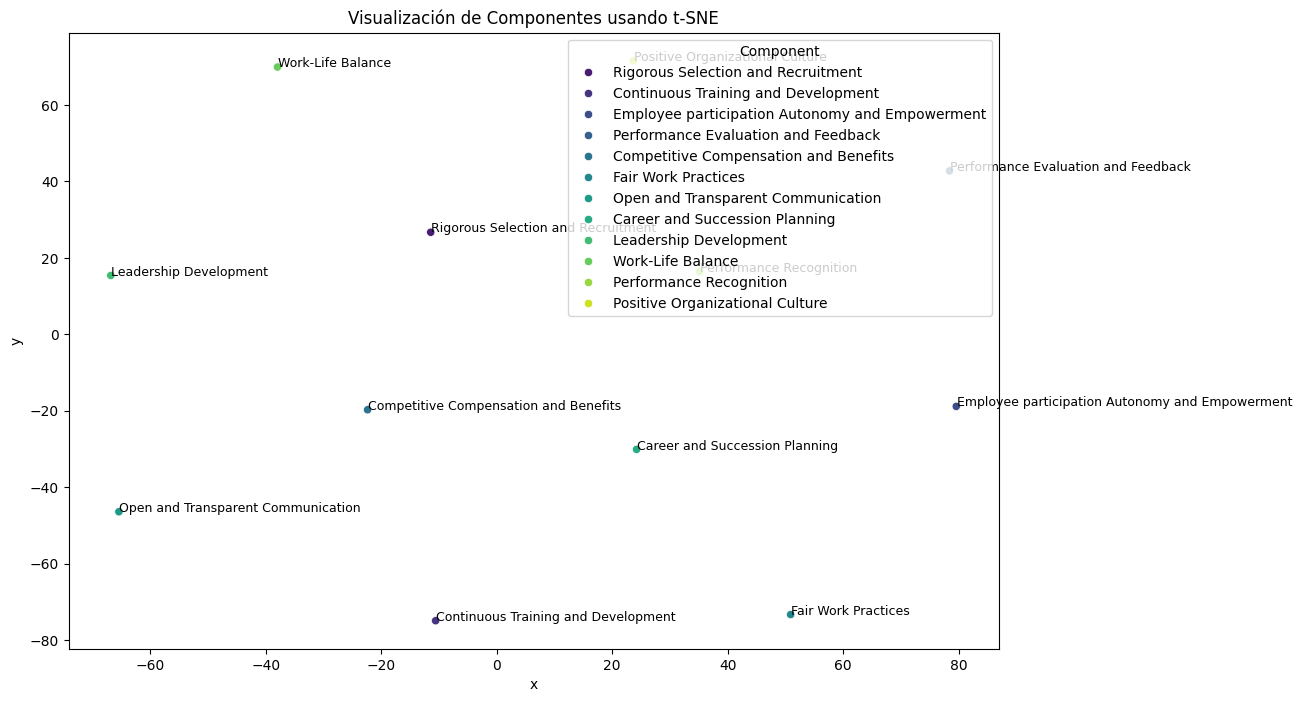

In [52]:
# # Instalar las dependencias necesarias
# !pip install transformers
# !pip install sentence-transformers
# !pip install scikit-learn

# Importar las bibliotecas necesarias
import pandas as pd
from sentence_transformers import SentenceTransformer
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import seaborn as sns
import numpy as np

# Leer el archivo CSV
hiwp_data = pd.read_csv("hiwp_components.csv")

# Cargar el modelo preentrenado de BERT
model = SentenceTransformer('bert-base-nli-mean-tokens')

# Obtener las descripciones
descriptions = hiwp_data['Description'].tolist()

# Generar los embeddings para cada descripción
embeddings = model.encode(descriptions)

# Calcular la matriz de similitud de coseno
cosine_sim_matrix = cosine_similarity(embeddings)

# Crear un DataFrame con las distancias de coseno
cosine_sim_df = pd.DataFrame(cosine_sim_matrix, index=hiwp_data['Component'], columns=hiwp_data['Component'])

# Mostrar la tabla de distancia de cosenos
print("Tabla de distancia de cosenos:")
print(cosine_sim_df)

# Ajustar la perplexity en función del número de muestras
n_samples = len(embeddings)
perplexity = min(30, n_samples - 1)

# Reducir las dimensiones de los embeddings para visualización usando t-SNE
tsne = TSNE(n_components=2, random_state=0, perplexity=perplexity)
embeddings_2d = tsne.fit_transform(embeddings)

# Crear un DataFrame con los componentes y sus coordenadas 2D
tsne_df = pd.DataFrame(embeddings_2d, columns=['x', 'y'])
tsne_df['Component'] = hiwp_data['Component']

# Visualizar los componentes en un gráfico 2D
plt.figure(figsize=(12, 8))
sns.scatterplot(x='x', y='y', data=tsne_df, hue='Component', palette='viridis')
for i in range(tsne_df.shape[0]):
    plt.text(tsne_df['x'][i]+0.1, tsne_df['y'][i], tsne_df['Component'][i], fontsize=9)
plt.title('Visualización de Componentes usando t-SNE')
plt.show()


# enfoque desde cero con Clasude 3.5
Quiero un codigo python para correr en google collab que 1) me permita ver los embeddings generados; 2) me agrupe los components por proximidad de embeddings; 3) una tabla de distancia de cosenos entre todos los componentes. Si es posible quiero que los embeedigns se extraigan con un modelo pre-entrenado (por ejmplo BERT o el que sea mas adecuado apra esta tareas) mis datos están en # Leer el archivo CSV
hiwp_data = pd.read_csv("hiwp_components.csv") que es un csv con dos columnas: Component,Description




In [53]:
import pkg_resources
import subprocess

required_packages = [
    'pandas',
    'numpy',
    'scikit-learn',
    'matplotlib',
    'sentence-transformers',
    'umap-learn'
]

installed_packages = {pkg.key for pkg in pkg_resources.working_set}

for package in required_packages:
    if package in installed_packages:
        print(f"{package} ya está instalado.")
    else:
        print(f"{package} no está instalado. Instalando...")
        subprocess.check_call(["pip", "install", package])
        print(f"{package} ha sido instalado.")

print("\nTodas las bibliotecas necesarias están ahora instaladas.")

pandas ya está instalado.
numpy ya está instalado.
scikit-learn ya está instalado.
matplotlib ya está instalado.
sentence-transformers no está instalado. Instalando...
sentence-transformers ha sido instalado.
umap-learn no está instalado. Instalando...
umap-learn ha sido instalado.

Todas las bibliotecas necesarias están ahora instaladas.


modules.json:   0%|          | 0.00/229 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/122 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/4.02k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/550 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/265M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/450 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/umap/umap_.py:2437: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(


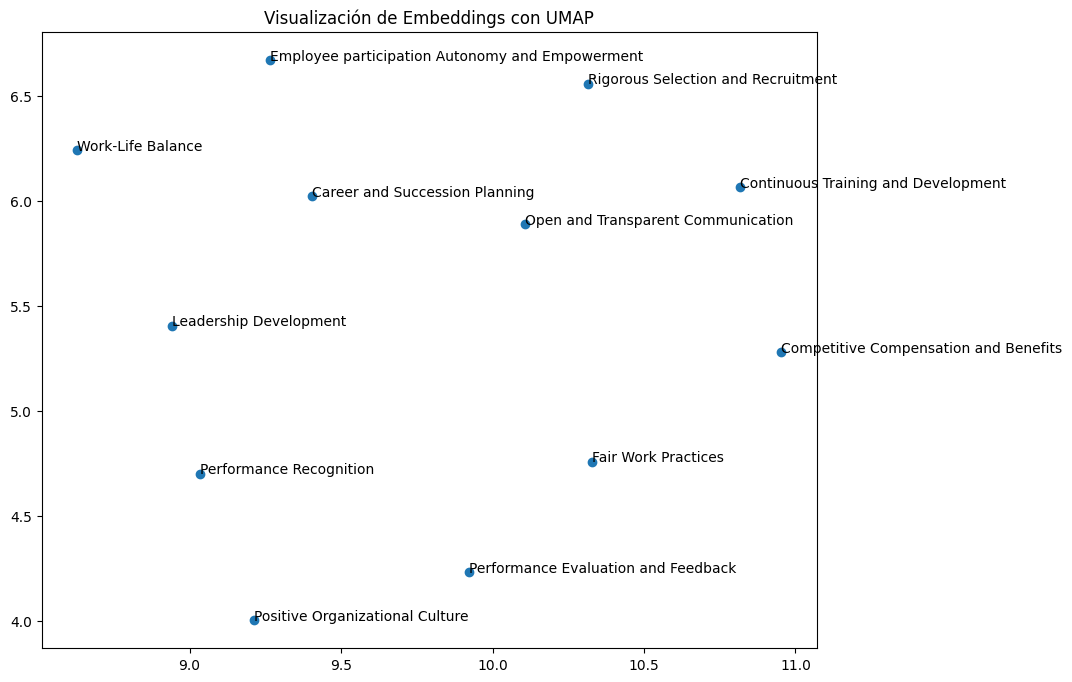

Componentes agrupados por cluster:

Cluster 0:
['Employee participation Autonomy and Empowerment', 'Career and Succession Planning', 'Leadership Development', 'Work-Life Balance']

Cluster 1:
['Competitive Compensation and Benefits']

Cluster 2:
['Performance Evaluation and Feedback', 'Fair Work Practices']

Cluster 3:
['Rigorous Selection and Recruitment', 'Continuous Training and Development', 'Open and Transparent Communication']

Cluster 4:
['Performance Recognition', 'Positive Organizational Culture']

Tabla de distancia de cosenos entre componentes:
Component                                        Rigorous Selection and Recruitment  \
Component                                                                             
Rigorous Selection and Recruitment                                         1.000000   
Continuous Training and Development                                        0.799669   
Employee participation Autonomy and Empowerment                            0.739793   
Per

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [54]:
# Importar las bibliotecas necesarias
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
from sentence_transformers import SentenceTransformer
from umap import UMAP


# Leer el archivo CSV
hiwp_data = pd.read_csv("hiwp_components.csv")

# Cargar el modelo pre-entrenado de BERT
model = SentenceTransformer('distilbert-base-nli-mean-tokens')

# Generar embeddings
embeddings = model.encode(hiwp_data['Description'].tolist())

# 1. Visualizar los embeddings generados
umap = UMAP(n_neighbors=15, n_components=2, metric='cosine')
umap_embeddings = umap.fit_transform(embeddings)

plt.figure(figsize=(10, 8))
plt.scatter(umap_embeddings[:, 0], umap_embeddings[:, 1])
for i, txt in enumerate(hiwp_data['Component']):
    plt.annotate(txt, (umap_embeddings[i, 0], umap_embeddings[i, 1]))
plt.title('Visualización de Embeddings con UMAP')
plt.show()

# 2. Agrupar los componentes por proximidad de embeddings
n_clusters = 5  # Puedes ajustar este número según tus necesidades
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
cluster_labels = kmeans.fit_predict(embeddings)

hiwp_data['Cluster'] = cluster_labels

print("Componentes agrupados por cluster:")
for cluster in range(n_clusters):
    print(f"\nCluster {cluster}:")
    print(hiwp_data[hiwp_data['Cluster'] == cluster]['Component'].tolist())

# 3. Crear una tabla de distancia de cosenos entre todos los componentes
cosine_sim = cosine_similarity(embeddings)
cosine_df = pd.DataFrame(cosine_sim, columns=hiwp_data['Component'], index=hiwp_data['Component'])

print("\nTabla de distancia de cosenos entre componentes:")
print(cosine_df)

# Guardar la tabla de distancia de cosenos en un archivo CSV
cosine_df.to_csv("cosine_distance_table.csv")
print("\nLa tabla de distancia de cosenos se ha guardado en 'cosine_distance_table.csv'")

#Este es con word2vec no con bert

In [27]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Crear el vectorizador TF-IDF
vectorizer = TfidfVectorizer()

# Ajustar y transformar las descripciones de componentes
component_descriptions = hiwp_data["Description"].tolist()
tfidf_matrix = vectorizer.fit_transform(component_descriptions)

# Crear una matriz de distancias de coseno
cosine_distances = 1 - cosine_similarity(tfidf_matrix)
distance_df = pd.DataFrame(cosine_distances, columns=hiwp_data["Component"], index=hiwp_data["Component"])
print("Tabla de distancias de coseno:")
print(distance_df)

# Agrupar los componentes por proximidad de embeddings
from sklearn.cluster import AgglomerativeClustering

clustering = AgglomerativeClustering(n_clusters=None, distance_threshold=0.5).fit(tfidf_matrix.toarray())
cluster_labels = clustering.labels_

# Crear un DataFrame con los componentes y sus clústeres
component_clusters = pd.DataFrame({
    "Component": hiwp_data["Component"],
    "Cluster": cluster_labels
})
print("\nComponentes agrupados por clústeres:")
print(component_clusters.groupby("Cluster")["Component"].apply(list))

Tabla de distancias de coseno:
Component                                        Rigorous Selection and Recruitment  \
Component                                                                             
Rigorous Selection and Recruitment                                    -2.220446e-16   
Continuous Training and Development                                    8.884809e-01   
Employee participation Autonomy and Empowerment                        8.797572e-01   
Performance Evaluation and Feedback                                    9.531774e-01   
Competitive Compensation and Benefits                                  9.022902e-01   
Fair Work Practices                                                    8.638251e-01   
Open and Transparent Communication                                     8.854838e-01   
Career and Succession Planning                                         7.791381e-01   
Leadership Development                                                 9.684206e-01   
Work-Life Ba

Retocar código python para gogle colab. Este código funciona pero queiro que muestre las distancias en formato decimal (sin elevar a potencias) y que me represente los clusters de componentes """from sklearn.feature_

Tabla de distancias de coseno:
Component                                        Rigorous Selection and Recruitment  \
Component                                                                             
Rigorous Selection and Recruitment                                          -0.0000   
Continuous Training and Development                                          0.8885   
Employee participation Autonomy and Empowerment                              0.8798   
Performance Evaluation and Feedback                                          0.9532   
Competitive Compensation and Benefits                                        0.9023   
Fair Work Practices                                                          0.8638   
Open and Transparent Communication                                           0.8855   
Career and Succession Planning                                               0.7791   
Leadership Development                                                       0.9684   
Work-Life Ba

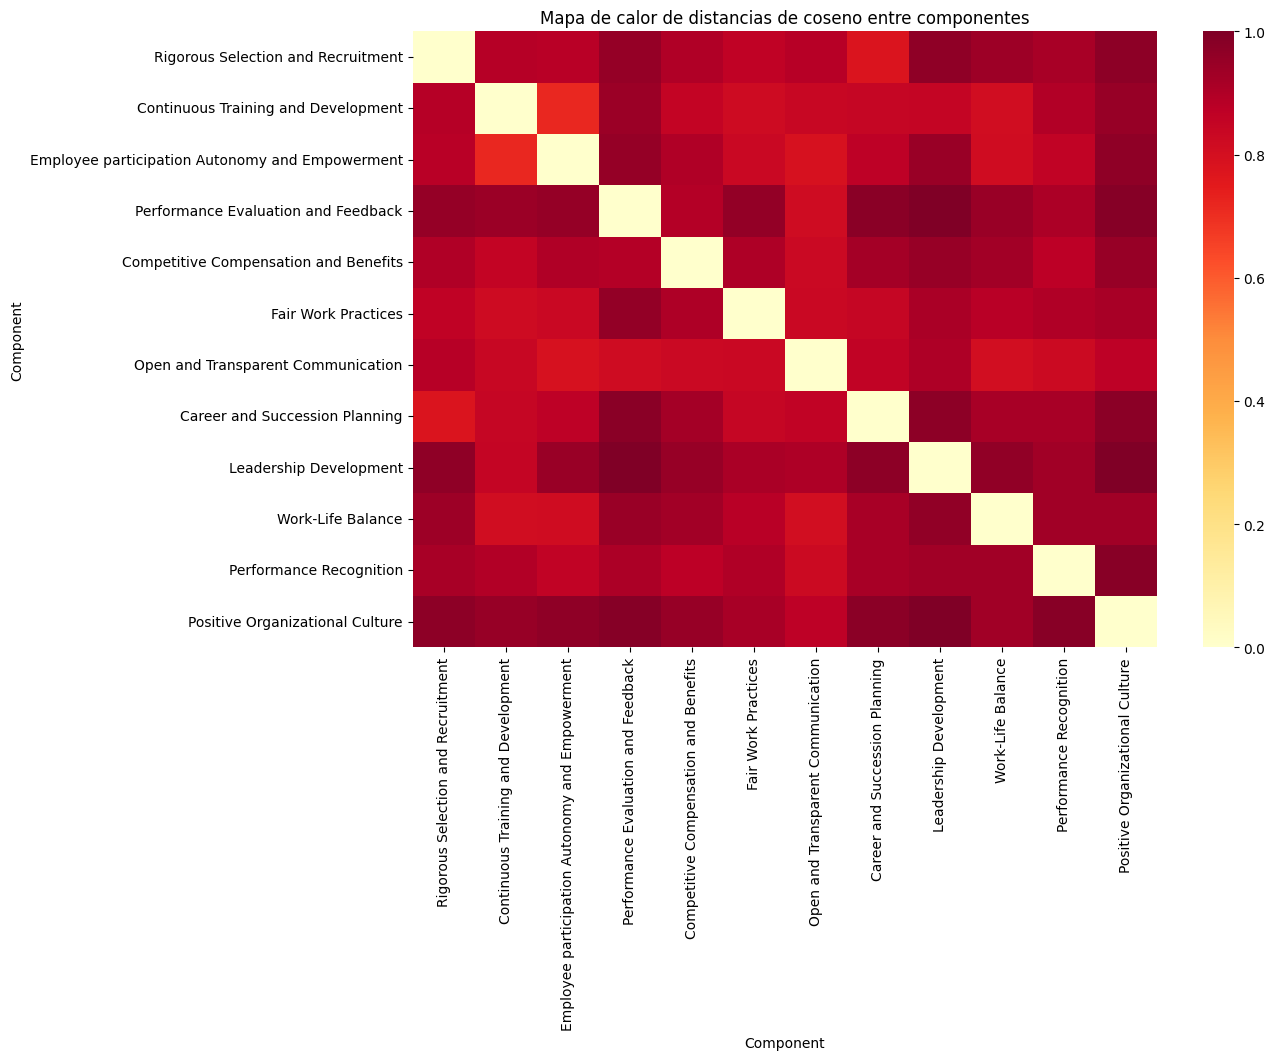

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


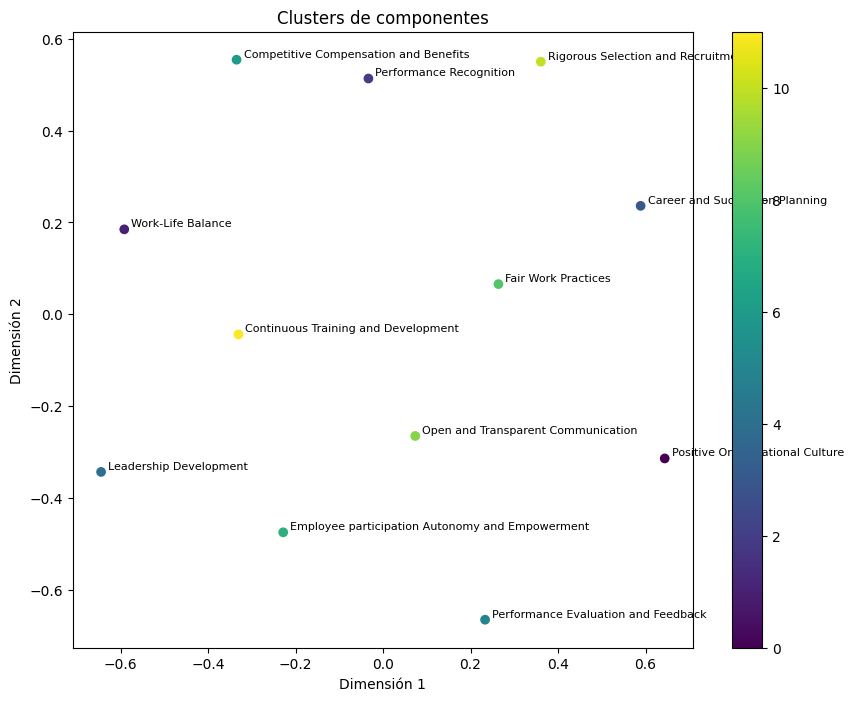

In [57]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt
import seaborn as sns

# Asumiendo que ya tienes hiwp_data cargado
# Si no, deberías cargarlo aquí

# Crear el vectorizador TF-IDF
vectorizer = TfidfVectorizer()

# Ajustar y transformar las descripciones de componentes
component_descriptions = hiwp_data["Description"].tolist()
tfidf_matrix = vectorizer.fit_transform(component_descriptions)

# Crear una matriz de distancias de coseno
cosine_distances = 1 - cosine_similarity(tfidf_matrix)
distance_df = pd.DataFrame(cosine_distances, columns=hiwp_data["Component"], index=hiwp_data["Component"])
print("Tabla de distancias de coseno:")
print(distance_df.round(4))  # Redondear a 4 decimales para mejor visualización

# Agrupar los componentes por proximidad de embeddings
clustering = AgglomerativeClustering(n_clusters=None, distance_threshold=0.5).fit(tfidf_matrix.toarray())
cluster_labels = clustering.labels_

# Crear un DataFrame con los componentes y sus clústeres
component_clusters = pd.DataFrame({
    "Component": hiwp_data["Component"],
    "Cluster": cluster_labels
})
print("\nComponentes agrupados por clústeres:")
print(component_clusters.groupby("Cluster")["Component"].apply(list))

# Visualizar los clusters
plt.figure(figsize=(12, 8))
sns.heatmap(distance_df, cmap='YlOrRd')
plt.title('Mapa de calor de distancias de coseno entre componentes')
plt.show()

# Visualizar los clusters en un gráfico de dispersión 2D
from sklearn.manifold import MDS

# Reducir la dimensionalidad a 2D
mds = MDS(n_components=2, dissimilarity='precomputed', random_state=42)
pos = mds.fit_transform(cosine_distances)

# Crear un gráfico de dispersión
plt.figure(figsize=(10, 8))
scatter = plt.scatter(pos[:, 0], pos[:, 1], c=cluster_labels, cmap='viridis')
plt.colorbar(scatter)

# Añadir etiquetas para cada punto
for i, txt in enumerate(hiwp_data["Component"]):
    plt.annotate(txt, (pos[i, 0], pos[i, 1]), xytext=(5, 2), textcoords='offset points', fontsize=8)

plt.title('Clusters de componentes')
plt.xlabel('Dimensión 1')
plt.ylabel('Dimensión 2')
plt.show()